## Analysis Section: The three observations made in this exhibit/challenge are: 

### 1.  This will actually be your last step once you run code below

### 2.  You will insert this cell above the one below

### 3.  How to do markdown in Jupyter Notebook?  https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_MouseStudy = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')


# Display the data table for preview

combined_MouseStudy.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.

#Use square brackets for isolation
#Value counts counts the unique items
#length to produce just the number

len(combined_MouseStudy["Mouse ID"].value_counts())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df=combined_MouseStudy

In [4]:
#Check each line/ filters

#set to value

duplicated_rows=df[df.duplicated(["Mouse ID", "Timepoint"])]

duplicated_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

new_df=df.drop_duplicates("Mouse ID")

new_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.Assign the variable

mouse_count=new_df["Mouse ID"].count()
mouse_count

249

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
 
mean=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standard_dv=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM=df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df=pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_dv, "SEM": SEM})

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

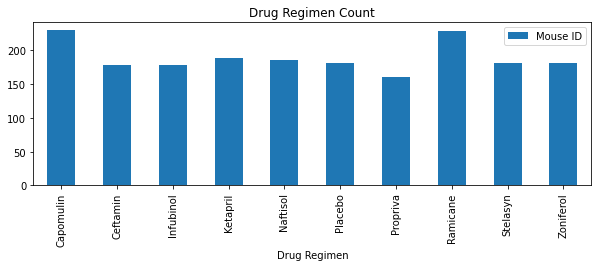

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_data = pd.DataFrame(df.groupby(["Drug Regimen"]).count()).reset_index()
drug_data = drug_data[["Drug Regimen", "Mouse ID"]]
drug_data = drug_data.set_index("Drug Regimen")


drug_data.plot(kind="bar", figsize=(10,3))

plt.title("Drug Regimen Count")
plt.show()


In [24]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_list = summary_df.index.tolist()
drug_list


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [29]:
#Turn into list

drug_count =(df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [39]:
import numpy as np

x_axis = np.arange(len(drug_count))

Text(0.5, 1.0, 'Treatment Count')

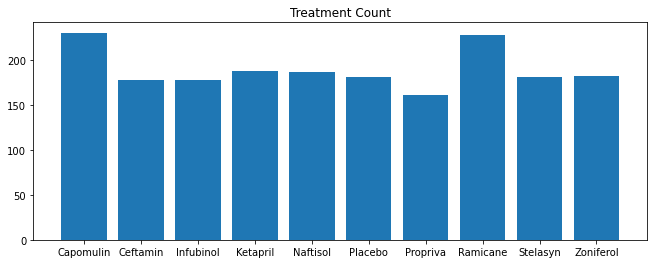

In [42]:
#Define x-axis
x_axis = drug_list
#Create the bar graph
plt.figure(figsize=(11,4))
plt.bar(x_axis,drug_count)

#Create titles for the graph

plt.title("Treatment Count")



In [52]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df =pd.DataFrame(df.groupby(["Sex"]).count()).reset_index()

gender_df

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


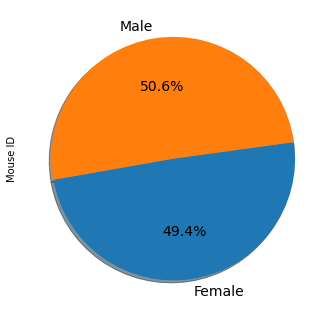

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(12,6))


#build the pie plot and add the percentages using autopct

ax1=plt.subplot(121, aspect='equal')

gender_df.plot(kind="pie", y="Mouse ID", ax=ax1, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=gender_df['Sex'], legend = False, fontsize=14)


## Quartiles, Outliers and Boxplots

In [120]:
# Start by getting the last (greatest) timepoint for each mouse, USE MAX

#max_tp=pd.DataFrame(df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
#max_tp

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#merged_df=pd.merge(df, max_tp, on='Mouse ID')

#merged_df

sort_df = merged_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
final_df = sort_df.loc[sort_df["Timepoint"]== 45]
final_df.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,309,b128,Capomulin,Female,9,22,45,38.982878,2,45
1,299,b742,Capomulin,Male,7,21,45,38.939633,0,45
2,244,g288,Capomulin,Male,3,19,45,37.074024,1,45
3,360,g316,Capomulin,Female,22,22,45,40.159220,2,45
4,440,i557,Capomulin,Female,1,24,45,47.685963,1,45


In [122]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#1. Capomulin


capomulin_df =final_df[final_df["Drug Regimen"].isin(['Capomulin'])]
capomulin_df.head().reset_index()



,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,309,b128,Capomulin,Female,9,22,45,38.982878,2,45
1,299,b742,Capomulin,Male,7,21,45,38.939633,0,45
2,244,g288,Capomulin,Male,3,19,45,37.074024,1,45
3,360,g316,Capomulin,Female,22,22,45,40.159220,2,45
4,440,i557,Capomulin,Female,1,24,45,47.685963,1,45


In [125]:
#Make Tumor Volume a df

capomulin_obj= capomulin_df.sort_values(["Tumor Volume (mm3)"], ascending = True).reset_index()
capomulin_obj=capomulin_obj["Tumor Volume (mm3)"]
capomulin_obj

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [126]:
# Put treatments into a list for for loop (and later for plot labels)

for drug in drugs:
    temp_df = merged_df.loc[merged_df['Drug Regimen']== drug]
    
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]

In [127]:
# All final volume values for each regimen
values= final_volume_df['Tumor Volume (mm3)']
drug_values.append(values)

In [128]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
#Calculate and print interquartile, upper and lower

quartiles = values.quantile([.25,.5,.75]) 
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR=upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {IQR}")
print(f"The median of temperatures is:{quartiles[0.5]}")

#Find upper and lower bounds
lower_bound = lowerq -(1.5*IQR)
upper_bound = upperq +(1.5*IQR)

#Print the results
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The median of temperatures is:59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<function matplotlib.pyplot.show(*args, **kw)>

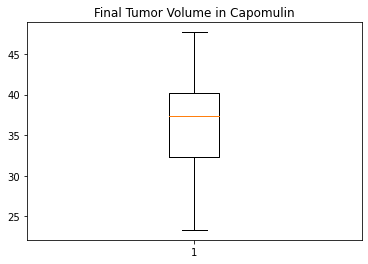

In [135]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin

figure1, axis1 = plt.subplots()
axis1.set_title("Final Tumor Volume in Capomulin")
#axis1.set_ylable("Final Tumor Volume (mm3)")
axis1.boxplot(capomulin_obj)
plt.show

In [137]:
#now set variable for Ramicane

ramicane_df= final_df[final_df["Drug Regimen"].isin(["Ramicane"])]
ramicane_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,327,a411,Ramicane,Male,3,22,45,38.407618,1,45
1,430,a444,Ramicane,Female,10,25,45,43.047543,0,45
2,214,a520,Ramicane,Male,13,21,45,38.810366,1,45
3,174,a644,Ramicane,Female,7,17,45,32.978522,1,45
4,154,c758,Ramicane,Male,9,17,45,33.397653,1,45


In [138]:
#make a column in the df for Ramicane and set variable

ramicane_object = ramicane_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramicane_object = ramicane_object["Tumor Volume (mm3)"]
ramicane_object

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    37.225650
13    37.311236
14    38.407618
15    38.810366
16    40.659006
17    40.667713
18    43.047543
19    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [139]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
#Calculate and print interquartile, upper and lower

quartiles = values.quantile([.25,.5,.75]) 
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR=upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {IQR}")
print(f"The median of temperatures is:{quartiles[0.5]}")

#Find upper and lower bounds
lower_bound = lowerq -(1.5*IQR)
upper_bound = upperq +(1.5*IQR)

#Print the results
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The median of temperatures is:59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<function matplotlib.pyplot.show(*args, **kw)>

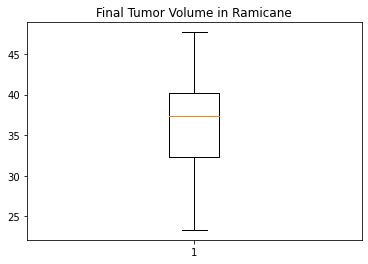

In [140]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Ramicane

figure1, axis1 = plt.subplots()
axis1.set_title("Final Tumor Volume in Ramicane")
#axis1.set_ylable("Final Tumor Volume (mm3)")
axis1.boxplot(capomulin_obj)
plt.show


In [141]:
#now set variable for Infubinol

infubinol_df= final_df[final_df["Drug Regimen"].isin(["Infubinol"])]
infubinol_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,463,a203,Infubinol,Female,20,23,45,67.973419,2,45
1,473,a251,Infubinol,Female,21,25,45,65.525743,1,45
2,540,a685,Infubinol,Male,8,30,45,66.083066,3,45
3,637,c139,Infubinol,Male,11,28,45,72.226731,2,45
4,800,e476,Infubinol,Male,23,26,45,62.435404,1,45


In [142]:
#make a column in the df for Infubinol and set variable

infubinol_object= infubinol_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infubinol_object = infubinol_object["Tumor Volume (mm3)"]
infubinol_object

0    60.918767
1    62.435404
2    62.754451
3    65.525743
4    66.083066
5    66.196912
6    67.685569
7    67.973419
8    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [143]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
#Calculate and print interquartile, upper and lower

quartiles = values.quantile([.25,.5,.75]) 
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR=upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {IQR}")
print(f"The median of temperatures is:{quartiles[0.5]}")

#Find upper and lower bounds
lower_bound = lowerq -(1.5*IQR)
upper_bound = upperq +(1.5*IQR)

#Print the results
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The median of temperatures is:59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<function matplotlib.pyplot.show(*args, **kw)>

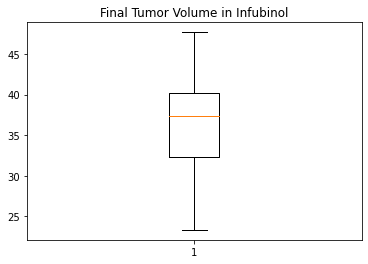

In [144]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Infubinol

figure1, axis1 = plt.subplots()
axis1.set_title("Final Tumor Volume in Infubinol")
#axis1.set_ylable("Final Tumor Volume (mm3)")
axis1.boxplot(capomulin_obj)
plt.show


In [147]:
# Calculate the final tumor volume of Ceftamin


ceftamin_df =final_df[final_df["Drug Regimen"].isin(['Ceftamin'])]
ceftamin_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3,45
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3,45
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3,45
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1,45
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3,45


In [148]:
#make a column in the df for Ceftamin and set variable

ceftamin_object = ceftamin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftamin_object = ceftamin_object["Tumor Volume (mm3)"]
ceftamin_object

0     59.741901
1     59.851956
2     61.386660
3     61.433892
4     61.849023
5     62.999356
6     64.299830
7     64.634949
8     64.729837
9     67.527482
10    67.748662
11    68.594745
12    68.923185
Name: Tumor Volume (mm3), dtype: float64

In [149]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
#Calculate and print interquartile, upper and lower

quartiles = values.quantile([.25,.5,.75]) 
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
IQR=upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {IQR}")
print(f"The median of temperatures is:{quartiles[0.5]}")

#Find upper and lower bounds
lower_bound = lowerq -(1.5*IQR)
upper_bound = upperq +(1.5*IQR)

#Print the results
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 48.72207785
The upper quartile of temperatures is: 64.29983003
The interquartile range of temperatures is: 15.577752179999997
The median of temperatures is:59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


<function matplotlib.pyplot.show(*args, **kw)>

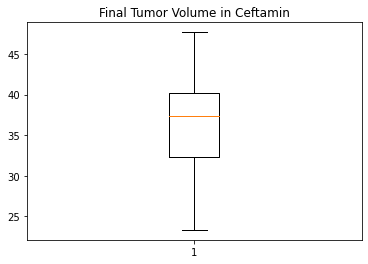

In [150]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Ceftamin

figure1, axis1 = plt.subplots()
axis1.set_title("Final Tumor Volume in Ceftamin")
#axis1.set_ylable("Final Tumor Volume (mm3)")
axis1.boxplot(capomulin_obj)
plt.show


## Line and Scatter Plots

In [180]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = combined_MouseStudy.loc[combined_MouseStudy["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [181]:
#Get the data from a mouse

capomulin_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"]== "s185"]
capomulin_mouse_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


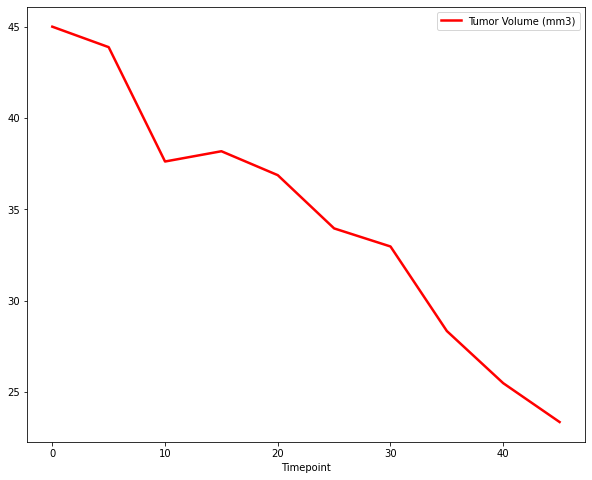

In [182]:
#Create the line graph

capomulin_mouse_df= capomulin_mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]


capomulin_mouse_df= capomulin_mouse_df.reset_index(drop=True)


capomulin_mouse_df.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, color= "red")

In [184]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df.head()



,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0


In [186]:
#Sort data

weight_df = capomulin_df.loc[:,["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


In [187]:
#Get the average tumor volume for each mouse using Capomulin

avg_capomulin =pd.DataFrame(weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capomulin

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [189]:
#Rename "Tumor Volume (mm3)" to "Average Volume"

avg_capomulin= avg_capomulin.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
avg_capomulin.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


<function matplotlib.pyplot.show(*args, **kw)>

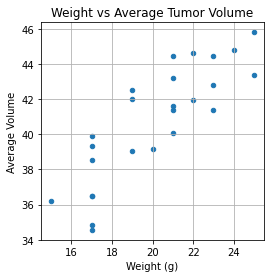

In [190]:
#Creating the scatter plot of mouse weight compared to the average tumor

avg_capomulin.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight vs Average Tumor Volume")
plt.show

In [204]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df= final_df.loc[final_df['Drug Regimen'] == 'Capomulin']
average_vol_df= pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns=
                                                                                                                              {'Tumor Volume (mm3)':'avg_tumor_vol'})
average_vol_df= pd.merge(capomulin_df, average_vol_df, on= 'Mouse ID')

In [206]:
#Set final variable

final_average_vol_df=average_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_average_vol_df

,Weight (g),avg_tumor_vol
0,22,38.982878
1,21,38.939633
2,19,37.074024
3,22,40.159220
4,24,47.685963
5,20,37.311846
6,23,38.125164
7,21,41.483008
8,19,38.846876
9,17,28.430964


In [207]:
#Set x and y vaariables

x = final_average_vol_df['Weight (g)']
y = final_average_vol_df['avg_tumor_vol']

In [208]:
#Calculate the correlation coefficient between mouse weight and average tumor volume

correlation = st.pearsonr(x,y)

In [210]:
#Print the answer to the question
print(f"""The correlation between the weight and average tumor volume is {round(correlation[0],2)}.""" )

The correlation between the weight and average tumor volume is 0.85.


## Correlation and Regression

In [213]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress 

(slope, intercept, rvalue, pvalue, stderr)= linregress(x, y)
regress_values = x*slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))




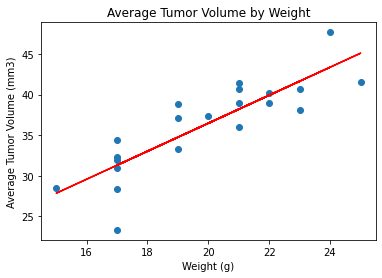

In [216]:
#Plot linear regression on top of scatter plot

plt.scatter(x,y)
plt.plot(x,regress_values, "r-")

#Add labels and a title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Weight")
plt.show()